In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

In [2]:
df = pd.read_csv('/content/finalproject_dataset_group4 (1).csv')
df.head()


,Feature1,Feature2,Feature3,Feature4
0,-1.310168,4.083988,8.821271,13.806908
1,-0.835933,8.889155,3.930402,5.829701
2,0.001279,9.217252,7.010031,5.185092
3,1.413789,4.427689,4.881688,13.408670
4,-0.953064,2.487238,4.596612,13.835109


In [3]:

# Examine data structure and contents
print(df.info())
print(df.describe(include='all'))  # For mixed data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  950 non-null    float64
 2   Feature3  950 non-null    float64
 3   Feature4  900 non-null    float64
dtypes: float64(4)
memory usage: 31.4 KB
None
          Feature1    Feature2    Feature3    Feature4
count  1000.000000  950.000000  950.000000  900.000000
mean     -0.006859   14.957228   -9.840993   20.055512
std       0.970913    6.810721    9.183450    7.141420
min      -3.066801   -9.854462  -38.354183  -22.317379
25%      -0.681379   10.153409  -17.433937   14.978085
50%      -0.015441   14.817456  -10.019369   20.063787
75%       0.645945   19.788773   -2.310372   25.371508
max       3.280300   58.055020   19.123528   54.857673


## data visualisation

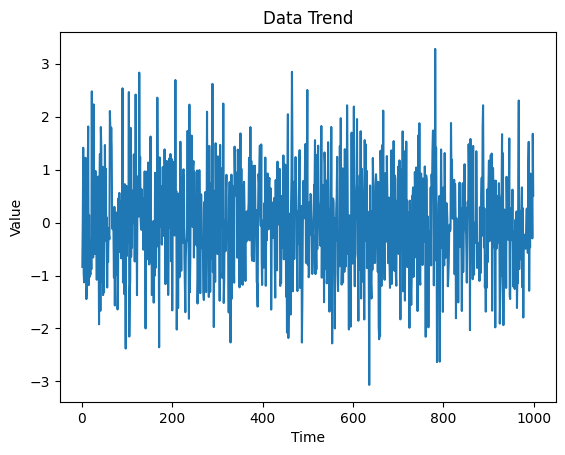

In [4]:
plt.plot(df.iloc[1:,0])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Data Trend')
plt.show()

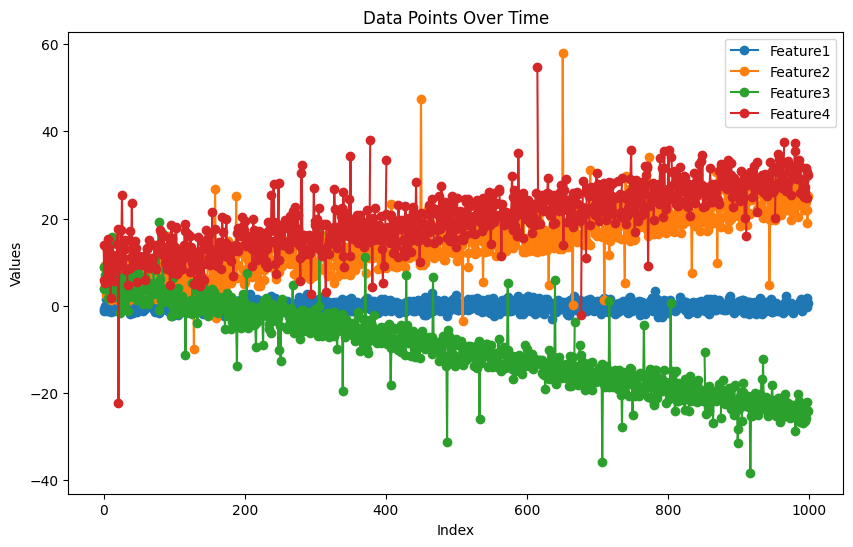

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Feature1'], marker='o', label='Feature1')
plt.plot(df.index, df['Feature2'], marker='o', label='Feature2')

plt.plot(df.index, df['Feature3'], marker='o', label='Feature3')
plt.plot(df.index, df['Feature4'], marker='o', label='Feature4')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Data Points Over Time')
plt.legend()
plt.show()

In [6]:
# Handle missing values
# Identify number of missing values per column
print(df.isnull().sum())

Feature1      0
Feature2     50
Feature3     50
Feature4    100
dtype: int64


In [7]:
 # Example 1: Fill with a specific value (e.g., the mean)
mean_value2 = df['Feature2'].mean()  # Calculate the mean of Feature1 (assuming it's numerical)
mean_value3 = df['Feature2'].mean()  # Calculate the mean of Feature1 (assuming it's numerical)
mean_value4 = df['Feature2'].mean()  # Calculate the mean of Feature1 (assuming it's numerical)

df['Feature2'].fillna(mean_value2, inplace=True)
df['Feature3'].fillna(mean_value3, inplace=True)
df['Feature4'].fillna(mean_value3, inplace=True)


In [8]:
print(df.isnull().sum())


Feature1    0
Feature2    0
Feature3    0
Feature4    0
dtype: int64


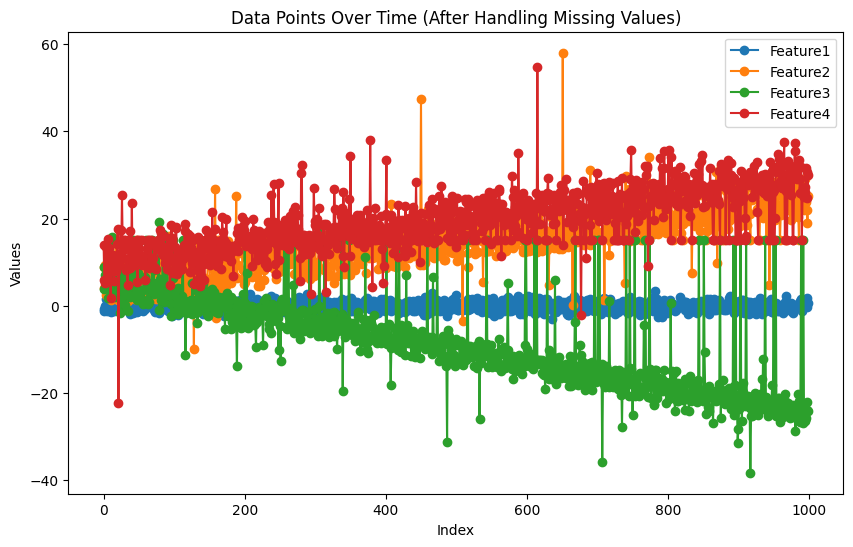

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Feature1'], marker='o', label='Feature1')
plt.plot(df.index, df['Feature2'], marker='o', label='Feature2')
plt.plot(df.index, df['Feature3'], marker='o', label='Feature3')
plt.plot(df.index, df['Feature4'], marker='o', label='Feature4')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Data Points Over Time (After Handling Missing Values)')
plt.legend()
plt.show()

## Apply Moving Average
##Apply a moving average technique to smooth out the data and observe any ##patterns or trends.

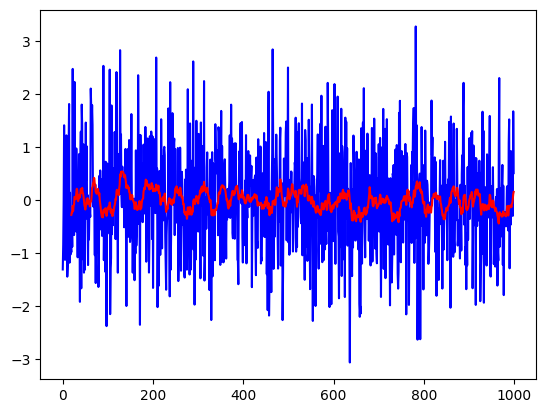

In [10]:

window_size = 20 # Adjust the window size as desired
moving_average = df['Feature1'].rolling(window_size).mean()
plt.plot(df['Feature1'], 'b', moving_average, 'r')


In [11]:
df.columns

Index(['Feature1', 'Feature2', 'Feature3', 'Feature4'], dtype='object')

##Identify outliers


## for x variable ,   Independent variable

Text(0.5, 0, 'Feature4')

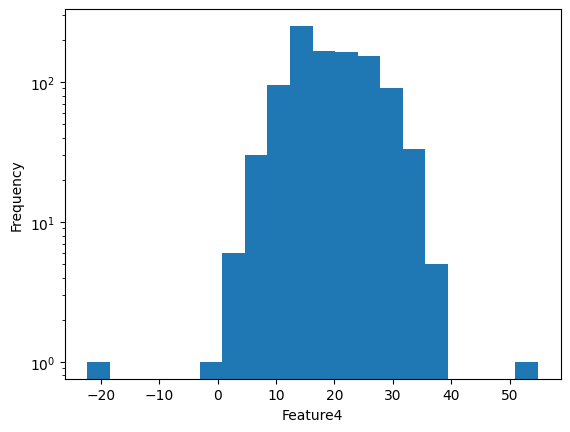

In [12]:
ax = df['Feature4'].plot(kind='hist',
bins=20,
title='',log=True)
ax.set_xlabel('Feature4')

## for y variable,   dependent variable:

Text(0.5, 0, 'Feature2')

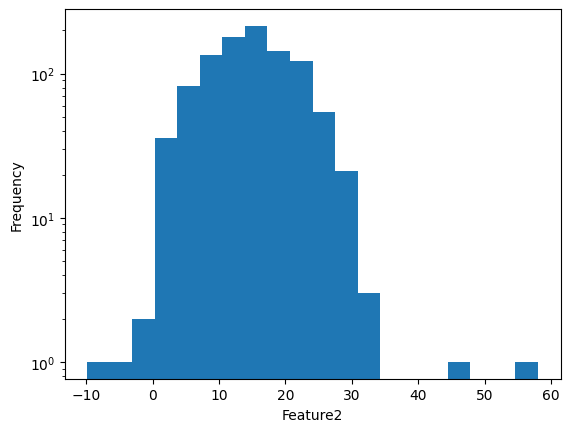

In [13]:
ay = df ['Feature2'].plot(kind='hist',
bins=20,
title='',log=True)
ay.set_xlabel('Feature2')

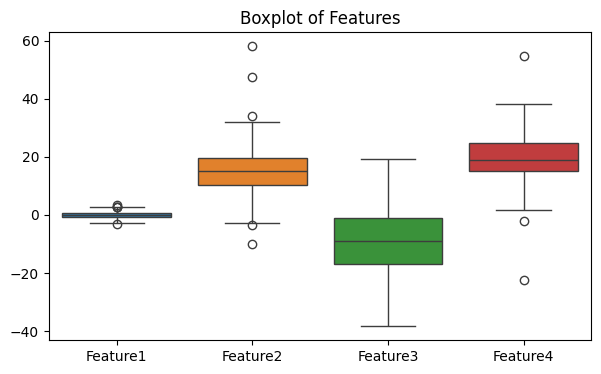

In [14]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.show()

## Removing outliers in Feature4


In [15]:
# Identify and describe outliers
# Use techniques like IQR (Interquartile Range) or boxplots
Q1 = df['Feature4'].quantile(0.25)
Q3 = df['Feature4'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Feature4'] >= lower_bound) & (df['Feature4'] <= upper_bound)]


## Correlation analysis


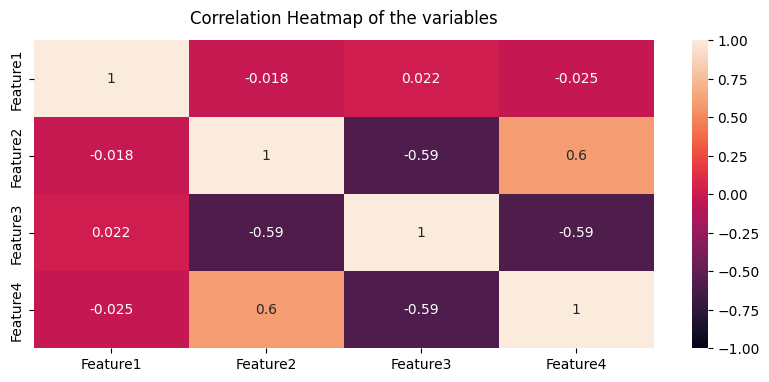

In [16]:
plt.figure(figsize=( 10, 4))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of the variables', fontdict={'fontsize':12}, pad=12);

In [17]:
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)



Correlation Matrix:
           Feature1  Feature2  Feature3  Feature4
Feature1  1.000000 -0.018467  0.022147 -0.024773
Feature2 -0.018467  1.000000 -0.589806  0.601549
Feature3  0.022147 -0.589806  1.000000 -0.588541
Feature4 -0.024773  0.601549 -0.588541  1.000000


In [18]:
#df.to_csv('/content/cleaned_dataset.csv', index=False)

In [19]:
import statsmodels.api as sm
model = sm.OLS(df["Feature2"], df['Feature4'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Feature2   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              8132.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                        0.00
Time:                        10:34:47   Log-Likelihood:                         -3097.4
No. Observations:                 997   AIC:                                      6197.
Df Residuals:                     996   BIC:                                      6202.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

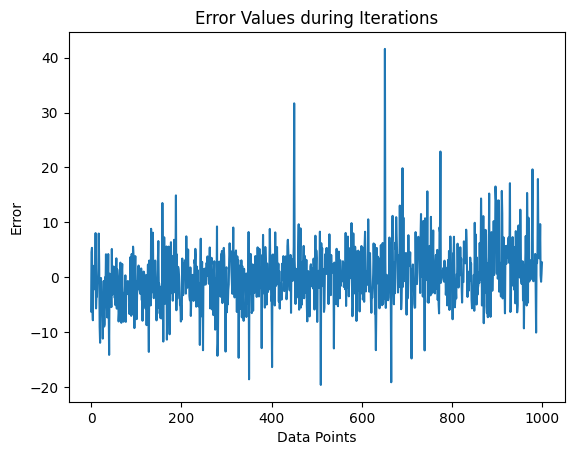

In [21]:
plt.plot(results.resid)
plt.title("Error Values during Iterations")
plt.xlabel("Data Points")
plt.ylabel("Error")
plt.show()